# 1. Comprensión del negocio

Este notebook esta destinado a cubrir parte de las dos primeras fases estipuladas en la metodología CRISP-DM (Cross Industry Standard Process for Data Mining), en este caso la comprensión del negocio y una primera fase de la comprensión de los datos.

Esta metodología se divide en las siguientes fases: 


1. <span style="color:#66FF99;">**Comprensión del Negocio (Business Understanding)**</span> 
   - Consistente en el entendimiento del objetivo y requisitos del proyecto, traduciendo las necesidades a una definición analítica del problema y una estrategia para abordarlo.

2. <span style="color:#66FF99;">**Comprensión de los Datos (Data Understanding)**</span> 
   - Relacionada con la carga y primera evaluación del conjunto de datos. Se divide a su vez en :
        1. <span style="color:#66FF99;">**Carga del conjunto de datos**</span> 
        2. Análisis exploratorio

3. **Preparación de los Datos (Data Preparation)** 
   - Consistente en la limpieza, preparación y extracción de características de los datos, de vital importancia para el modelado dado que determinará la calidad de los datos.

4. **Modelado (Modeling)** 
   - Relacionada con la elección del modelo de machine learning y el ajuste hiperparamétrico.

5. **Evaluación (Evaluation)**  
   - Evaluación de los resultados obtenidos por el modelo, determinando si cumple con los requisitos definidos en la primera de las fases y si es factible su implementación.

6. **Implementación (Deployment)**  
   - Integración del modelo de forma que sea accesible para su uso, en este caso mediante un sistema web desarrollado en Dash.





<a id="business-understanding"></a>

## 1. Business understanding

El problema a tratar se trata de la obtención de descripciones de las escenas a partir de los cotidianos presentes en las mismas, con enfasis en aquellos elementos que sean especialmente relevantes para la mejora de la accesibilidad en personas con discapacidad visual.


Es por ello que podemos definir este problema como uno de **segmentación semántica**, al ser necesaria la obtención de regiones dentro de una imagen de entrada que se correspondan con los objetos a detectar, de tal forma que cada uno de los píxeles de esta quede clasificado como una clase de un conjunto de clases finito, diferenciandose así de  otros problemas como el de clasificación de imágenes, donde se asigna una etiqueta o categoría a la imagen de forma global, el de detección, donde se localizan objetos delimitandolos por cajas o bounding boxes, o el de segmentación de instancias, que identifica cada instancia de cada objeto de forma separada. Un ejemplo práctico cada uno de los problemas anteriores se observa en la figura siguiente:


<img src="./../assets/figs/problema.png" alt="Problema a resolver" style="width: 50%; height: auto;">



<a id="data-understanding"></a>

## 2. Data understanding

Una vez definido el problema, se procede a la carga del conjunto de datos, que en este caso se corresponde con la segunda fase de la metodología CRISP-DM.


Esta etapa se divide dos fases:

1. Descarga del conjunto de datos y primera visualización de imágenes y máscaras
2. Análisis exploratorio del conjunto de datos

Para una mejor organización, en este notebook abordará la primera de ellas, estando alojada la segunda en `src\exploratory_data_analysis.ipynb`



### 2.1 Carga del conjunto de datos


En este caso se ha decidido hacer uso del dataset `MS COCO` en su más reciente actualización, que data del 2017, siendo posible acceder a su documentación en el siguiente [enlace](https://cocodataset.org/#home), frente a otros 
datasets como `ADE20K`, principalmente por su alto volumen de datos y mayor variedad de clases etiquetadas, que permitirán la obtención de un modelo más enfocado para nuestro caso de uso.

Este dataset destaca por contener, en su versión mas reciente, hasta un total de casi 200.000 imágenes, en las cuales se encuentran hasta un total de 1.5 millones de objetos diferentes segmentados de hasta un total de 80 clases diferetes. Fue propuesto por Microsoft en 2014 y actualizado en 2017 y puede ser utilizado para resolver problemas de detección de objetos, segmentación semántica y segmentación de instancias, además de contener keypoints de las 17 partes del cuerpo humano más relevante para la detección de poses. Cabe destacar una gran variedad de resoluciones de las imágenes, fuentes de datos de su obtención, al ser obtenidas a partir de plataformas como Flickr y de una variedad de geografías, que hacen que ayudan a que el entrenamiento de un modelo con este conjunto de datos pueda generalizar mejor.





Existen dos formas de cargarlo en memoria, por un lado puede ser cargado a disco directamente descargando los datos de su web, o bien a partir de la libreria `tensorflow_datasets`, que dejará el dataset almacenado en memoria de forma temporal.


Podemos almacenarlo de forma permanente de la siguiente manera: 

In [1]:
import importlib
import utils
from pathlib import Path
import os

Para una gestión más eficiente de variables comunes en diferences notebooks se hace uso de un fichero `yaml`, donde se almacenarán constantes útiles relativas a más de un fichero, como los paths de almacenamiento de las imágenes, dando lugar a un código más limpio y con menor tasa de error.

In [ ]:

from utils import  load_yaml_file, download_zip


Se cargan las constantes necesarias definidas en este fichero yaml

In [ ]:
yaml = load_yaml_file()

# Constante relativa a la direccion destino de la carga de imagenes del dataset
DIR_IMGS_DATASET_RAW = yaml["dir_datasets"]

In [ ]:

# Nos colocamos en la raiz para que el path sea el adecuado

DIR_IMGS_DATASET_RAW 
dir_data_load = os.path.join(os.getcwd(),"..",DIR_IMGS_DATASET_RAW)
dir_data_load = os.path.normpath(dir_data_load)
dir_data_load

'c:\\Users\\ruben\\Desktop\\code_tfm\\dataset\\coco'

#### Descarga del conjunto de imágenes

Se procede a la descarga automatizada de estos en los directorios destino, junto con sus archivos de anotación correspondiente:

In [ ]:

segments = True  
dir = Path(DIR_IMGS_DATASET_RAW)  
URL_BASE = 'https://github.com/ultralytics/assets/releases/download/v0.0.0/'

# Fichero usado para obtener las labels del cto de datoss
urls = [URL_BASE + ('coco2017labels-segments.zip' if segments else 'coco2017labels.zip')]
# Urls de las direcciones donde se hostean los .zip con las imágenes
urls += [
    'http://images.cocodataset.org/zips/train2017.zip',
    'http://images.cocodataset.org/zips/val2017.zip',
    'http://images.cocodataset.org/zips/test2017.zip',
]

destinos = [os.path.join(dir_data_load, nombre_destino) for  nombre_destino in ["segments", "train", "val", "test"] ]
filenames = ["segments.zip","train2017.zip", "val2017.zip", "test2017.zip"]



Se procede a la descarga

In [ ]:
for url, destino, nombre in zip(urls, destinos, filenames):
    print("Procesando: ",url, destino, nombre)
    download_zip(url, destino, nombre)


### Visualización inicial

Se carga alguna imagen para comprobar la carga correcta del conjunto de datos

In [13]:
import matplotlib.pyplot as plt
import cv2
from pycocotools.coco import COCO
import numpy as np
import random

Para ello cargamos la API para el conjunto de entrenamiento

In [15]:

DIR_TRAIN_ANNOTATIONS = yaml["dirs"]["anotaciones"]["train"]
DIR_TRAIN_IMGS = yaml["dirs"]["imagenes"]["train"]
DIR_TRAIN_IMGS = os.path.join(os.getcwd(),"..", DIR_TRAIN_IMGS)

coco=COCO(os.path.join(os.getcwd(),"..", DIR_TRAIN_ANNOTATIONS))

loading annotations into memory...
Done (t=27.98s)
creating index...
index created!


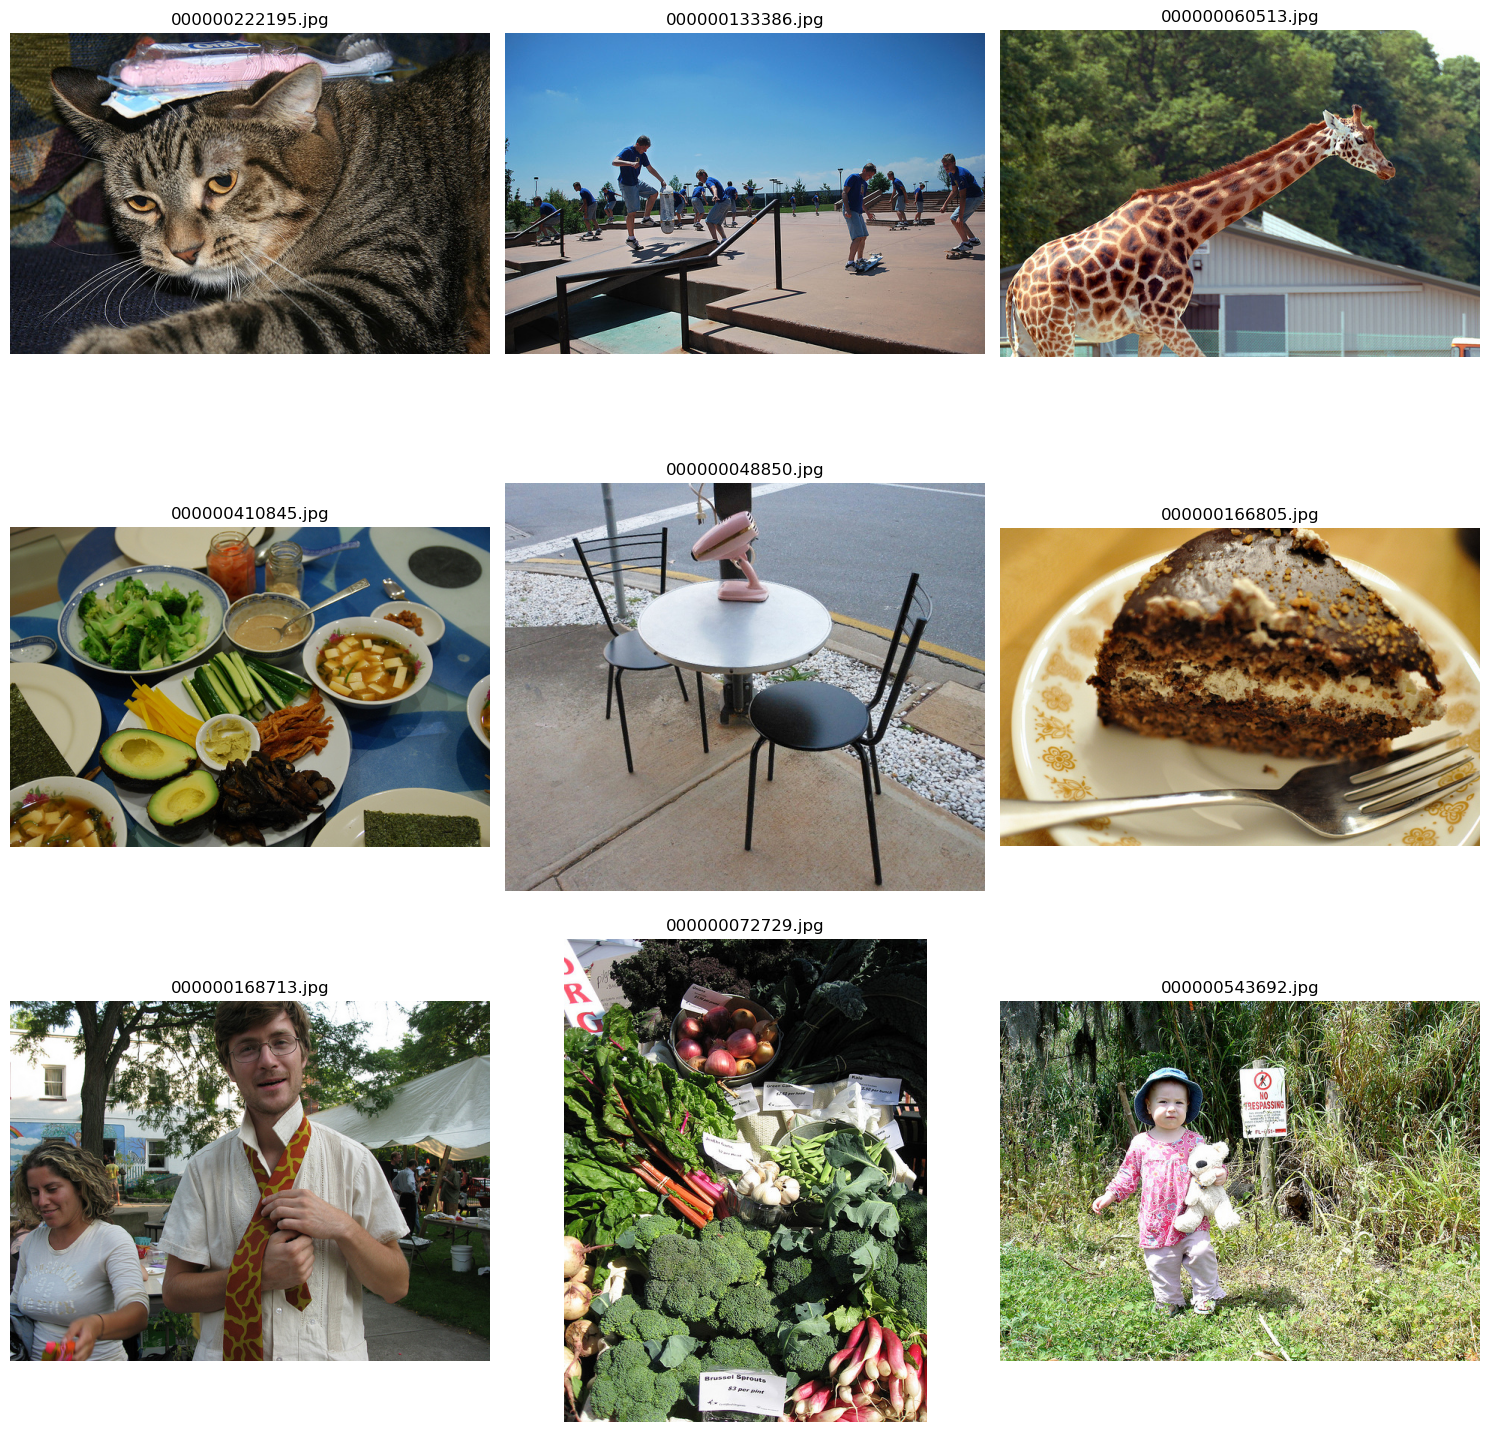

In [ ]:
image_ids = list(coco.imgs.keys())

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

 # Aplanamos para que sea mas facil distribuir las graficas (3 por fila)
axes = axes.flatten()
for i, _ in enumerate(image_ids[:9]):
    img_id = random.choice(image_ids)
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(DIR_TRAIN_IMGS,img_info['file_name'])

    #print(img_path)
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[i].imshow( img )
    axes[i].set_title( img_info['file_name'] )
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Asimismo, se comprueba que la carga de los segmentos ha sido la adecuada usando una imagen aleaotria

In [18]:
import random
from matplotlib.patches import Patch


In [19]:
image_ids = coco.getImgIds()

# Garantizamos la reproducibilidad fijando la semilla
random.seed(42)
random_image_id = random.choice(image_ids)
image = coco.loadImgs(random_image_id)[0]

annotation_ids = coco.getAnnIds(imgIds=random_image_id)
annotations = coco.loadAnns(annotation_ids)

Se cargan los nombres de las categorías para las leyendas:

In [27]:
categories = coco.loadCats(coco.getCatIds())
category_id_to_name = {category['id']: category['name'] for category in categories}

print(category_id_to_name)

{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'micro

Ahora se plotea un par de pares imagen - máscara

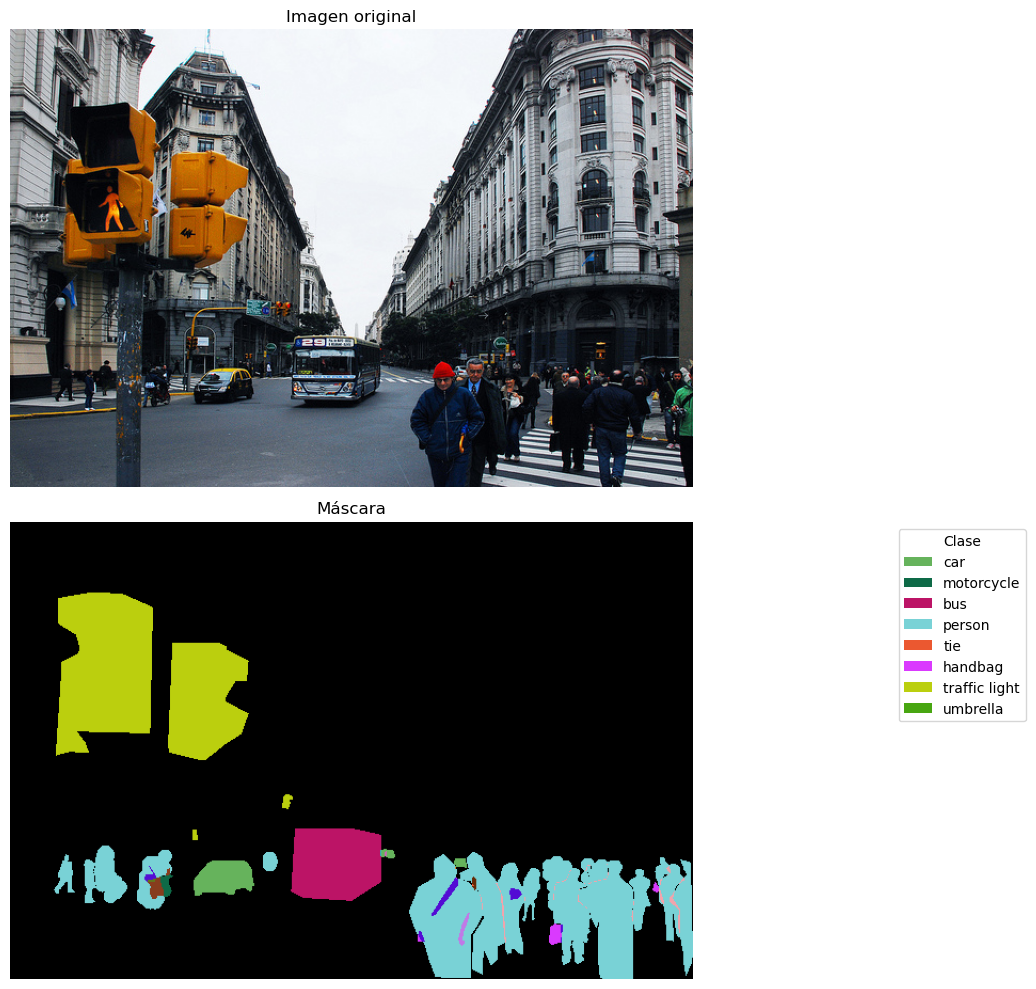

In [ ]:


# Cargamo la imagen de memoria en primer lugar
img_path = os.path.join(DIR_TRAIN_IMGS, image['file_name'])

original_image = cv2.imread(img_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
fig , axs = plt.subplots(2,1, figsize=(15, 10))
axs = axs.flatten()  

axs[0].imshow(original_image)
axs[0].axis('off')
axs[0].set_title('Imagen original')

legend_elements = []
# print(type(image))
# print(image)

matriz_base = np.zeros((*original_image.shape[:2], 3), dtype=np.uint8)

# Generamos colores aleatorios para las mascaras
# De nuevo garantizamos la reproducibilidad fijando la semilla
np.random.seed(42) 
colors = np.random.randint(0, 256, size=(len(annotations), 3))
anotated = []
colors_anotated = {}


# Se itera por máscara y se colorea por su color correspondiente 
for ann, color in zip(annotations, colors[:len(annotations)]):
    label = ann['category_id'] 
    mask = coco.annToMask(ann)

    if(label in anotated):
        color = colors_anotated[label]
    else:
        colors_anotated[label] = color
        anotated.append(label)
        legend_elements.append(Patch(facecolor=np.array(color) / 255, label=f'{category_id_to_name[label]}'))

    for c in range(3):  
        matriz_base[:,:,c] += mask*color[c]

axs[1].imshow(matriz_base)
axs[1].axis('off')
axs[1].set_title('Máscara')
plt.legend(handles=legend_elements, loc='upper right',bbox_to_anchor=(1.5, 1),title="Clase")
plt.tight_layout()
plt.show()

Repetimos para hasta N elementos

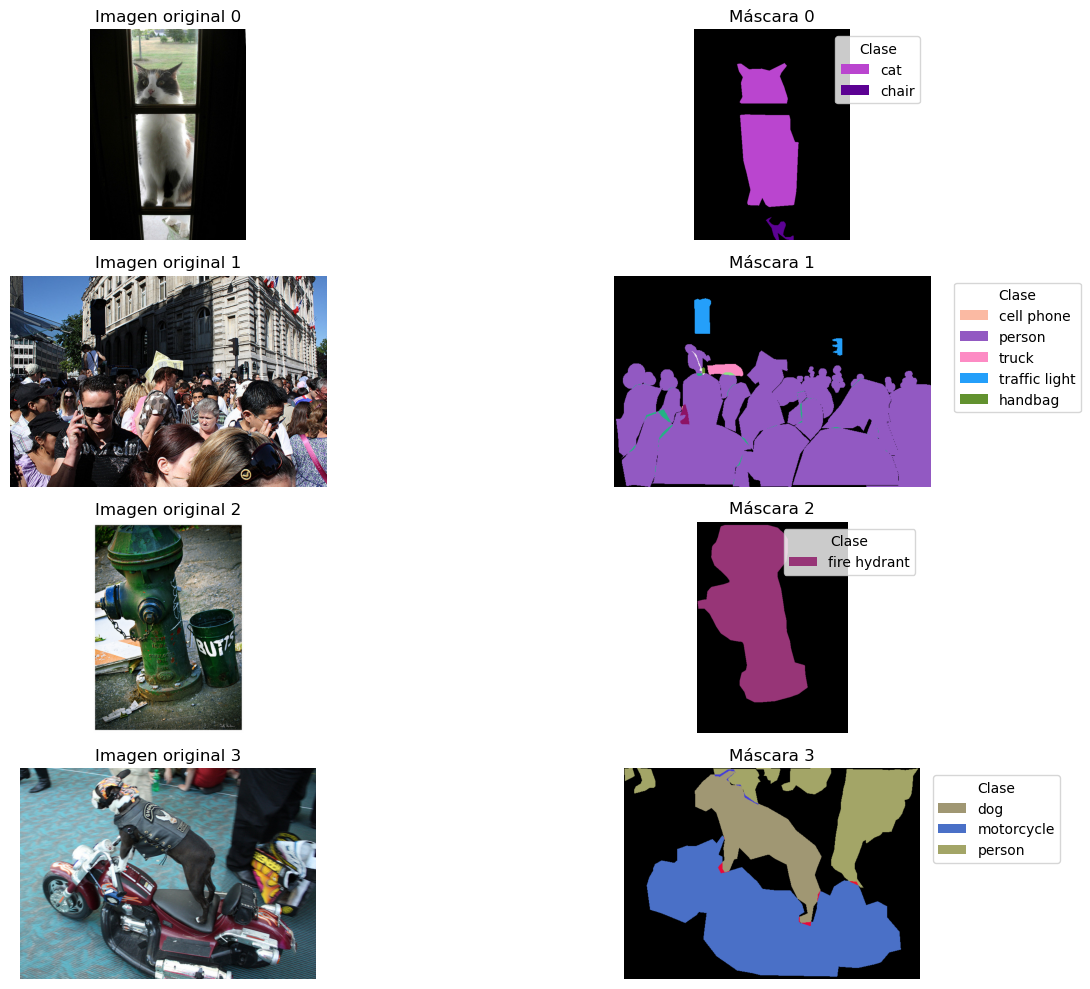

In [ ]:

N = 4

fig , axs = plt.subplots(N,2,figsize=(15,10))
axs = axs.flatten() 

for idx in range(N):
    random_image_id =random.choice(image_ids)
    image = coco.loadImgs(random_image_id)[0]
    
    annotation_ids =coco.getAnnIds(imgIds=random_image_id)
    annotations = coco.loadAnns(annotation_ids)

    img_path = os.path.join(DIR_TRAIN_IMGS, image['file_name'])
    original_image = cv2.imread(img_path)
    original_image = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
 

    axs[idx*2].imshow(original_image)
    axs[idx*2].axis('off')
    axs[idx*2].set_title(f'Imagen original {idx}')

    legend_elements = []
    matriz_base = np.zeros((*original_image.shape[:2],3),dtype=np.uint8)

    colors = np.random.randint(0, 256, size=(len(annotations), 3))
    anotated =[]
    colors_anotated = {}

    for ann, color in zip(annotations, colors[:len(annotations)]):
        label = ann['category_id'] 
        mask = coco.annToMask(ann)

        if(label in anotated):
            color = colors_anotated[label]
        else:
            colors_anotated[label] = color
            anotated.append(label)
            legend_elements.append(Patch(facecolor=np.array(color) / 255, label=f'{category_id_to_name[label]}'))

        for c in range(3):  
            matriz_base[:, :, c] += mask * color[c]

    axs[idx*2+1].imshow(matriz_base)
    axs[idx*2+1].axis('off')
    axs[idx*2+1].set_title(f'Máscara {idx}')
    axs[idx*2+ 1].legend(handles=legend_elements, loc='upper right',bbox_to_anchor=(1.5,1),title="Clase")
plt.tight_layout()
plt.show()